In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class']= (df['class'] == 'g').astype(int)

**What is machine learning ?**

Machine learning is a subset of computer science which focuses on certain algorithms which helps a computer learn from data without a pragrammer being there and telling the computer exactly what to do.

**AI vs ML vs DS**

AI - area of computer science where the goal is to enable computers and machines to perform himan like tasks and simulate human behaviou.

ML - subset of AI that tries to solve a specific problem and make prediction using data

DS - a field which attempts to find patterns and draw insights from the data

**Types if Machine learing**

Supervised learning - uses labeled inputs to train model and learn outputs

Unsupervised learning - uses unlabeled data to learn about patterns in a data

Reinforcement learning - agent learning in interactive environment based on reward and penalties

A machine leaning model

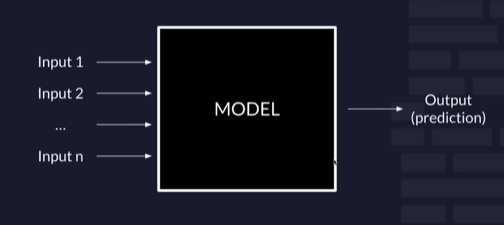

Features (or feature vector) (numbers as computer understand numbers)

1) Qualitative - Categorical data

Nominal data -  meaning no inherent order (eg - boy/girl, nationality)
We use one-hot coding for qualitative features.

eg - boy = [1,0], girl = [0,1]

Ordinal data - meaning inherent order (eg - Grades) - We use Label encoding.

eg - Poor = 1, Good = 2, Very Good = 3

2) Quantitative - numerical vlaued data (could be a discrete or continous)

Outputs

1) Classification - predict discrete classes



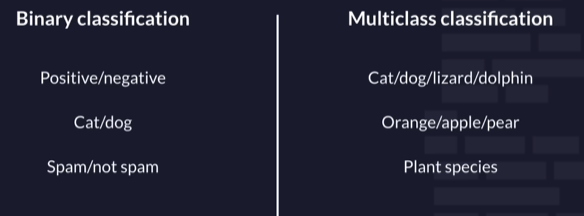

2. Regression - predict continous values

eg - price of house, stock price

Dataset

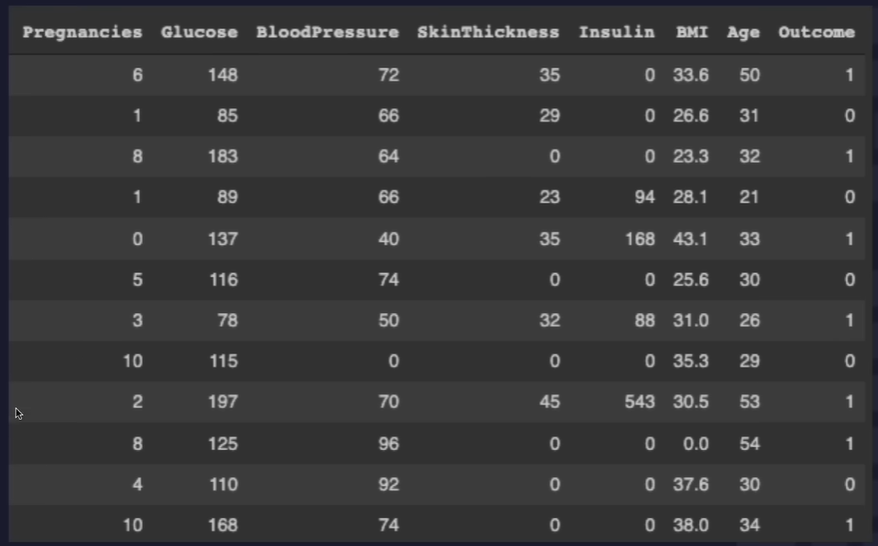

Each row = different sample in the data

Each column = different feature (not the output column tho)

So one row here (excluding outcome) is called a feature vector and all the rows and column (excluding outcome) is known as feature matrix.

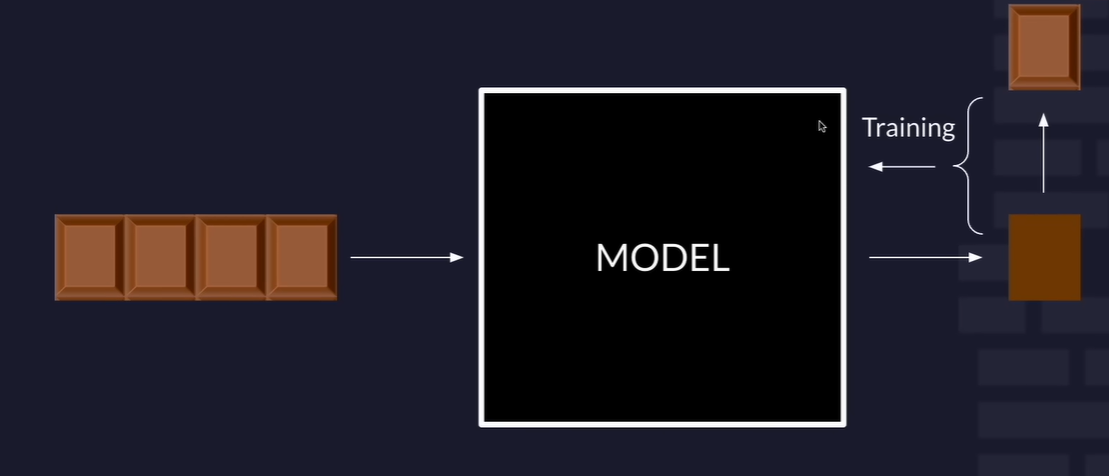

Now the output which we get from our model, we then compare it to the actual output and then based on the comparison we tweak some changes in the model so we get closer to our output ...... this is what we call ***training*** our model.

If we put our entire dataset into our model for training, then we will fail to acess how well our model will genralize. It might do well if the model has seen this data over and over again but we can't get our model to acess the prediction on new data.

So we divide our dataset into Training (80 %), Validation (20 %), and Testing (20 %) sets to avoid this.

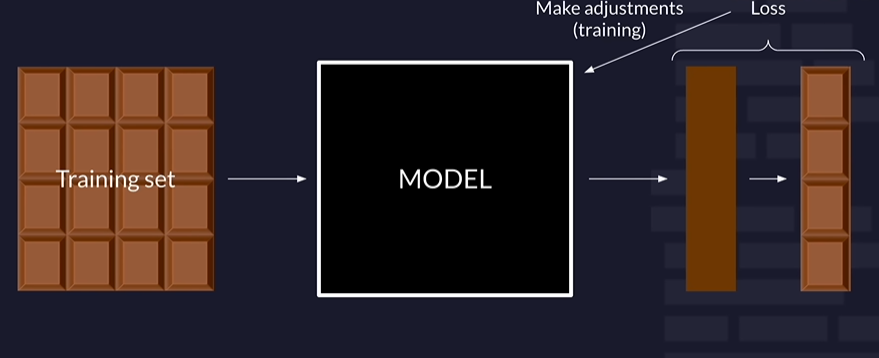

The difference between the predicted and the actual output between of the features is known as ***loss***. And based on the loss, we make adjustments which we called training.

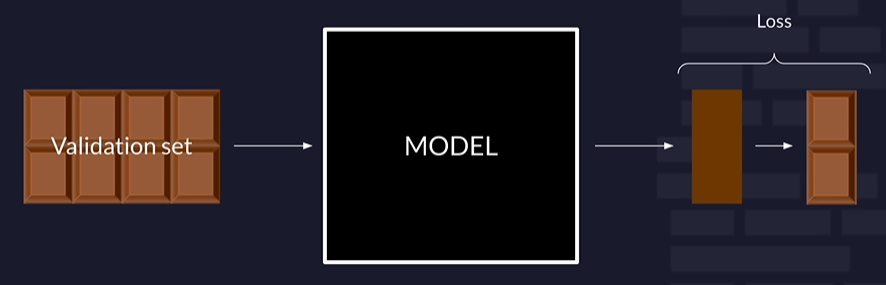

Validation set ensures that our model generalizes well on unseen data. Now the loss is not fed back to the model here.

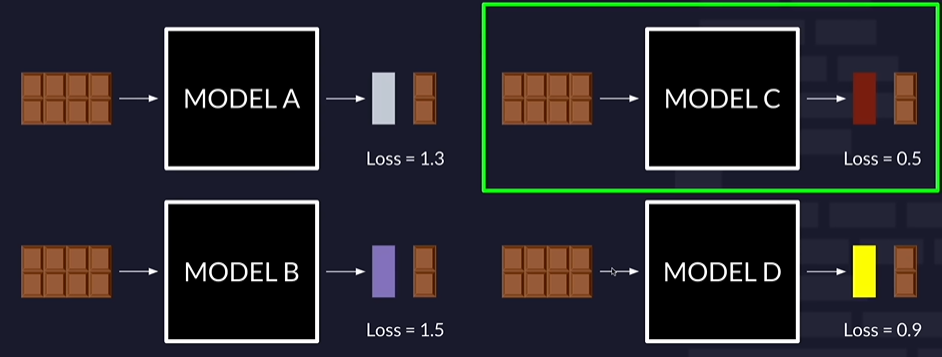

  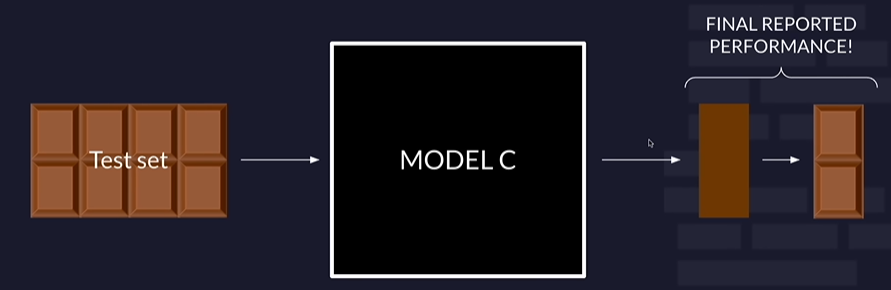

The test test is used to check how generalizable our final model chosen is.

Metrics of performance

1) Loss

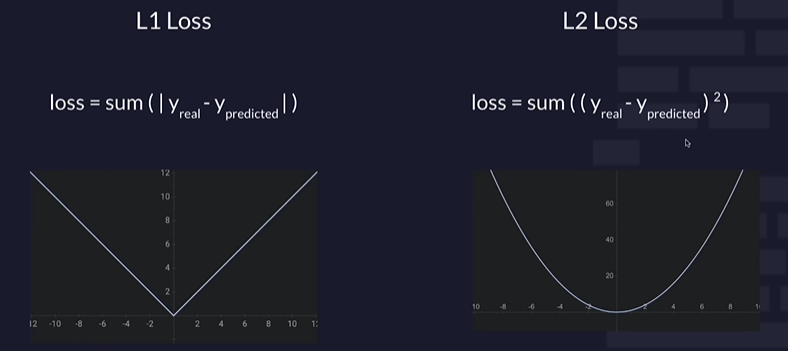

L2 loss penalises outliers more

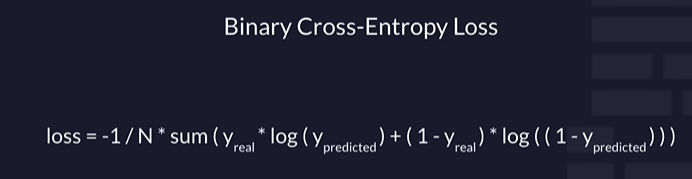

Loss decreases as performance gets better.

2) Accuracy

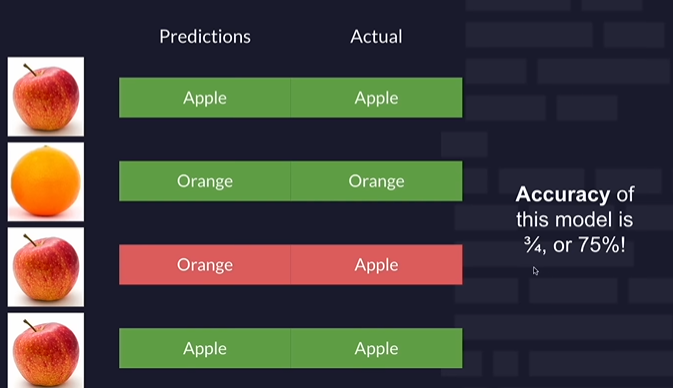

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

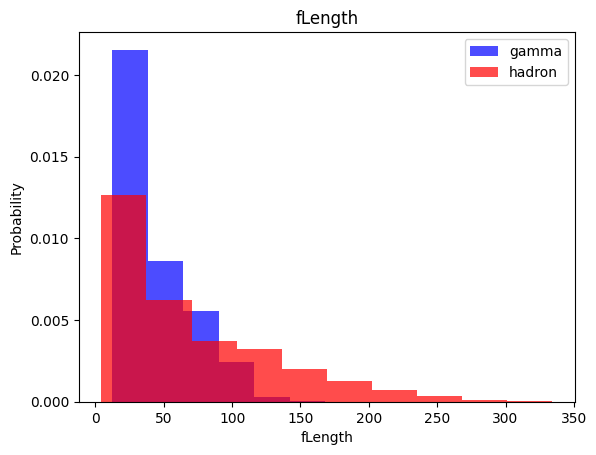

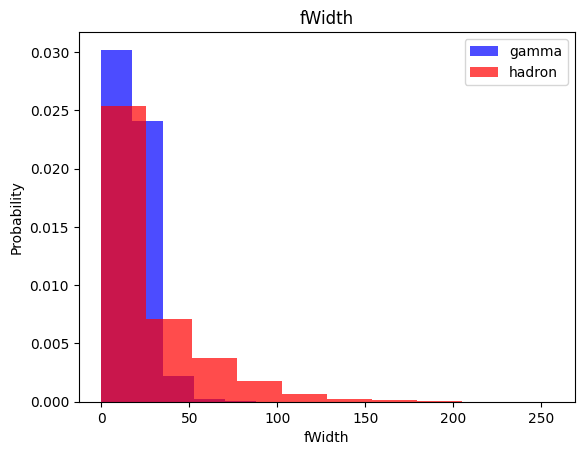

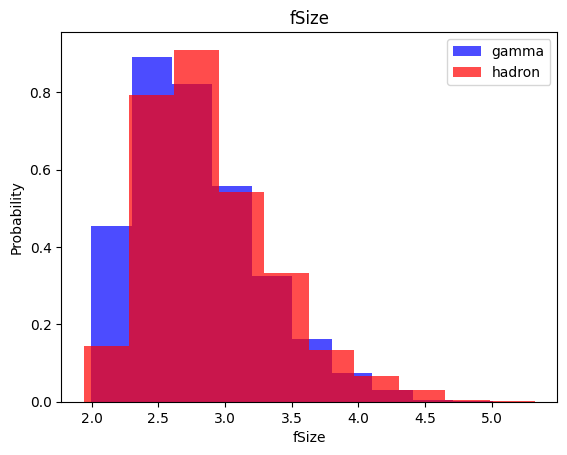

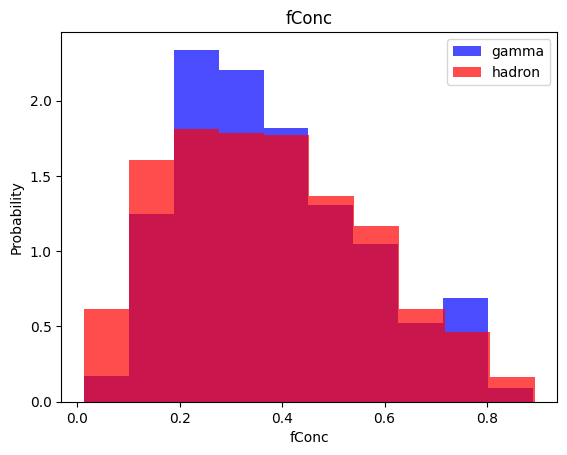

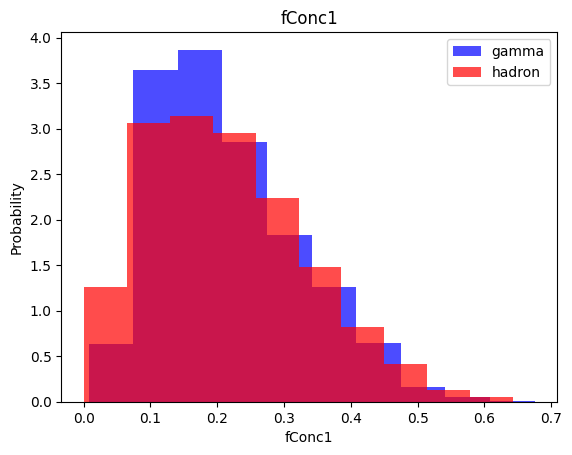

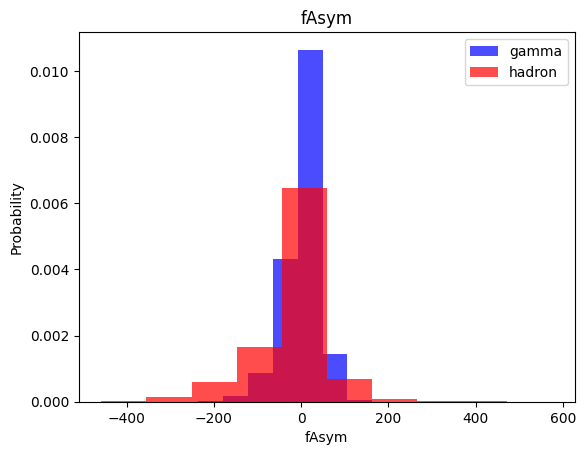

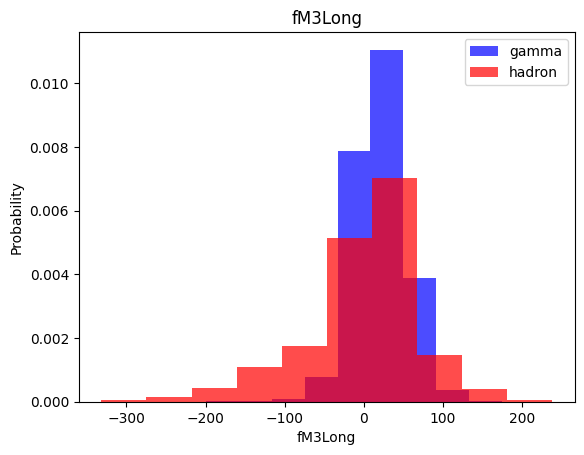

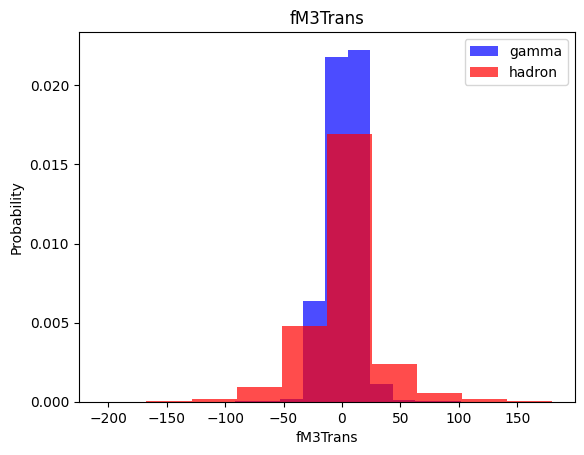

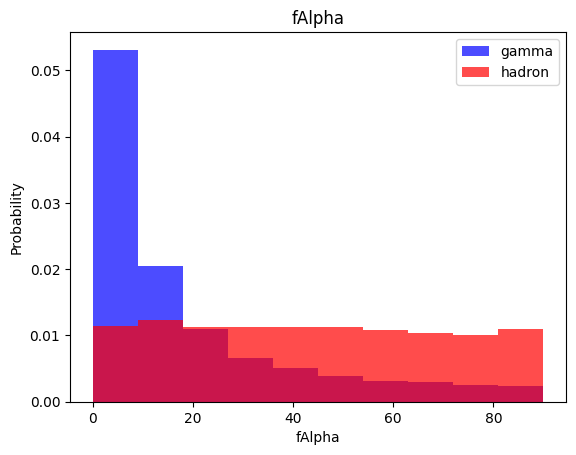

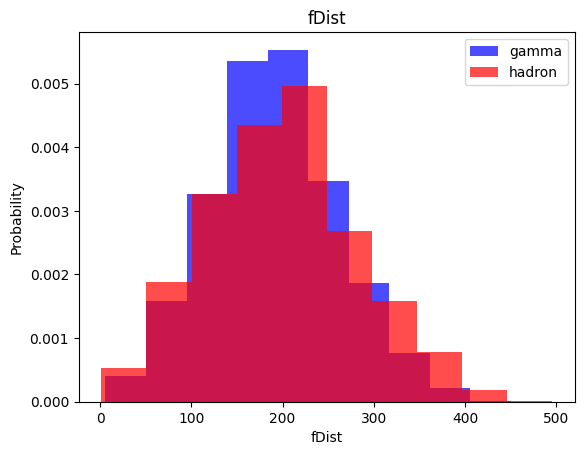

In [10]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], label="gamma", color="blue", alpha =0.7, density=True)
  # aplha means transparency, by enablng density as true, we are ensuring comparison b/w two
  plt.hist(df[df["class"]==0][label], label="hadron", color="red", alpha =0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [32]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


we will want to scale the data because the range of some data is aorund 0 to 200 while some is around 0 to 1

In [33]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1)))) #numpy is particular about dimension so are converting y into a 2D array
  return data, x,y

In [34]:
print(len(train[train["class"]==0]))
print(len(train[train["class"]==1]))

4088
7324


as there is more data belonging to one class we will oversample the inferior class

In [35]:
train, x_train, y_train = scale_dataset(train, oversample=True)

In [36]:
sum(y_train==0)

np.int64(7324)

In [37]:
sum(y_train==1)

np.int64(7324)

In [38]:
val, x_val, y_val = scale_dataset(val, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

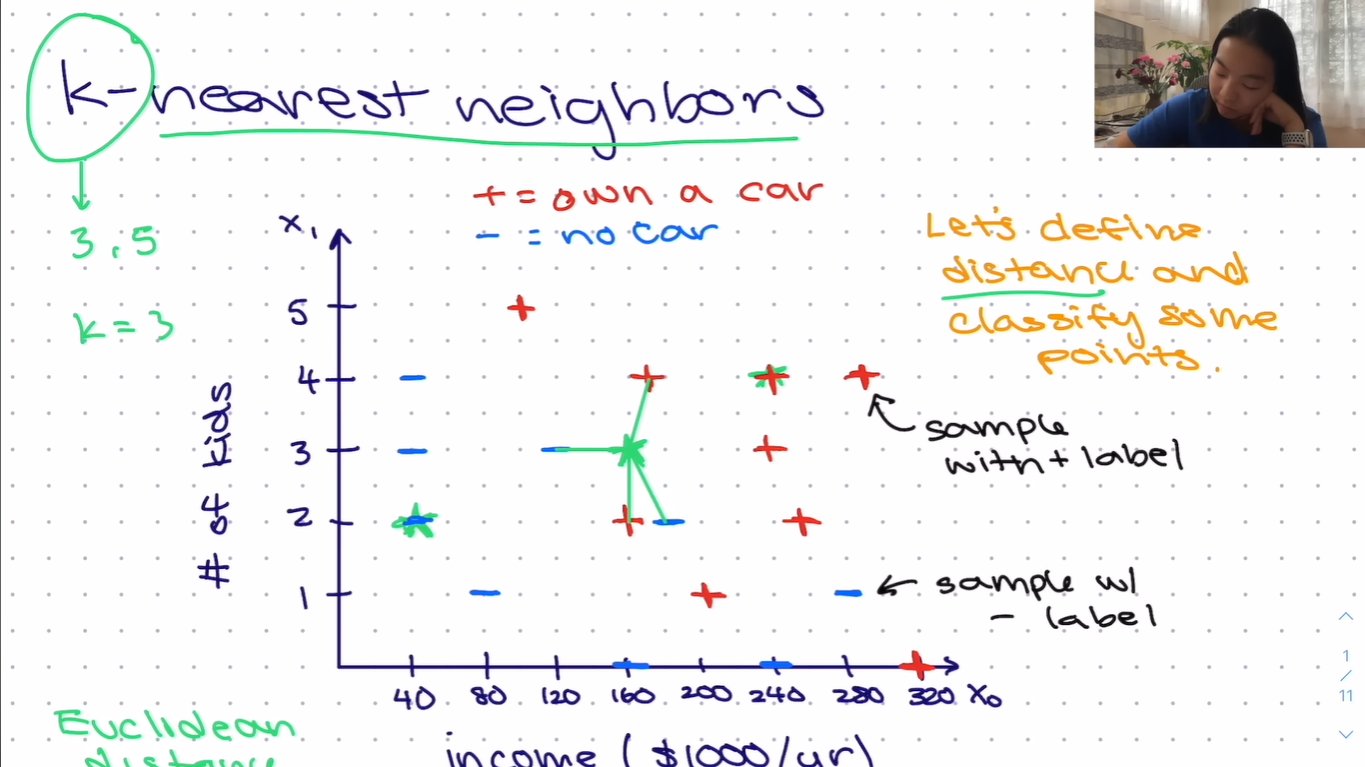

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred=knn_model.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1339
           1       0.86      0.86      0.86      2465

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



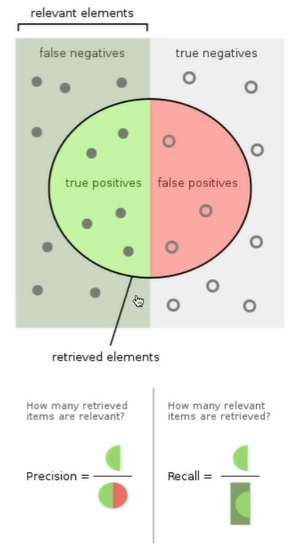

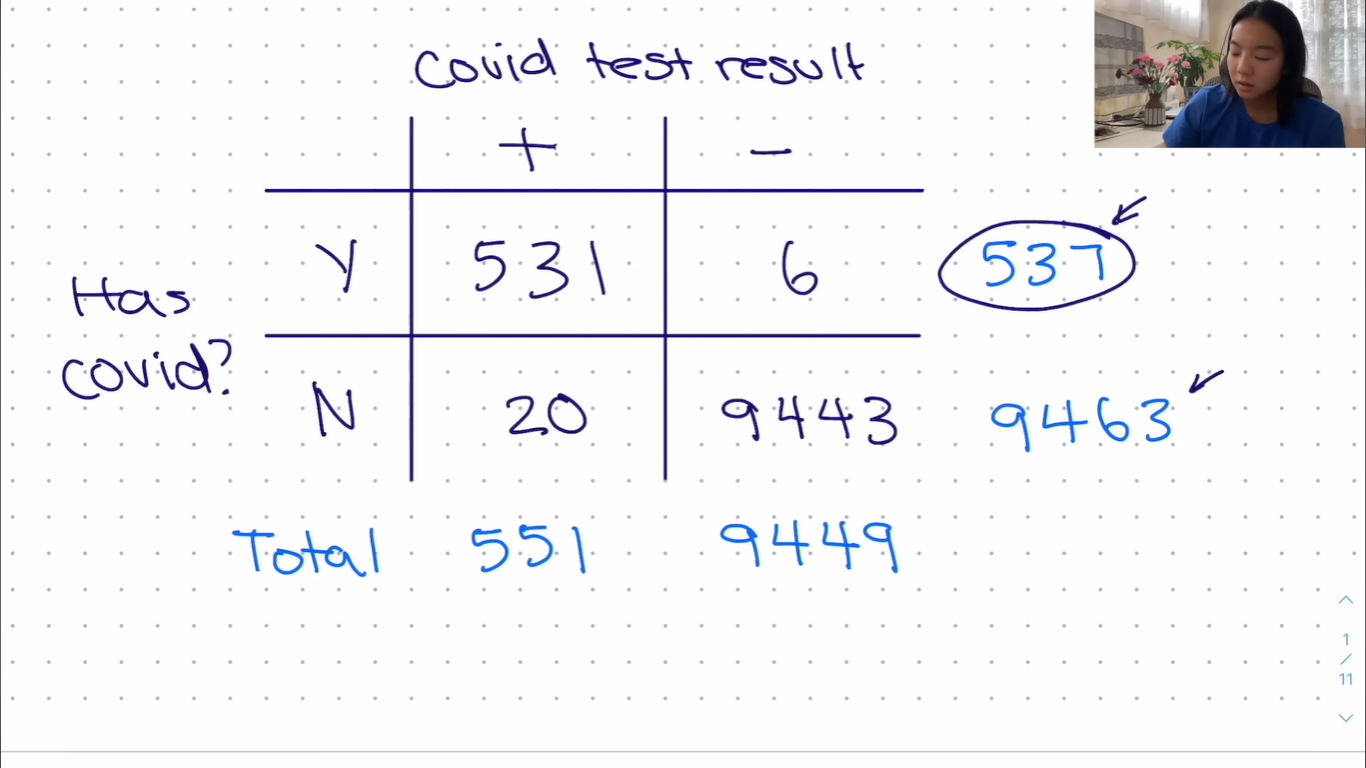

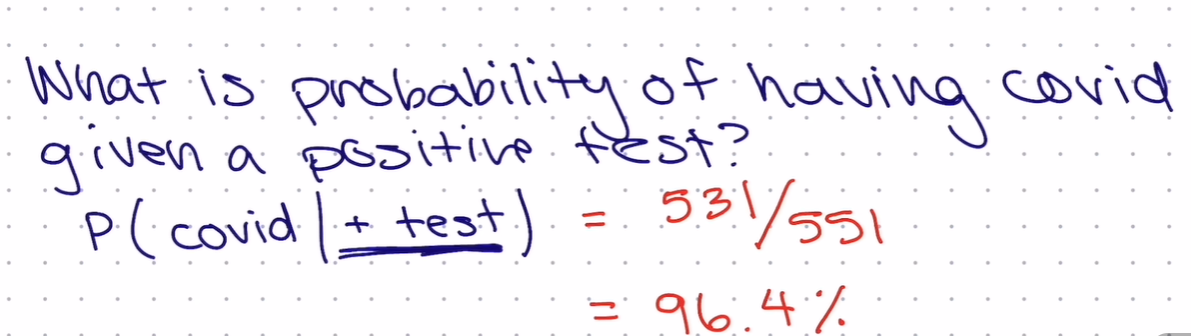

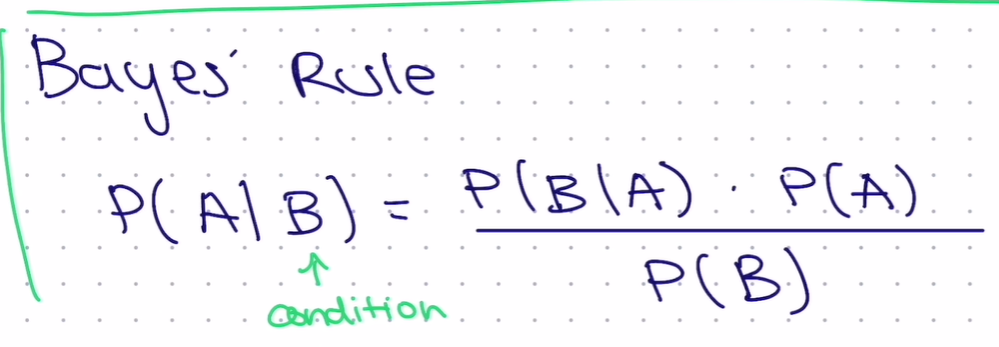

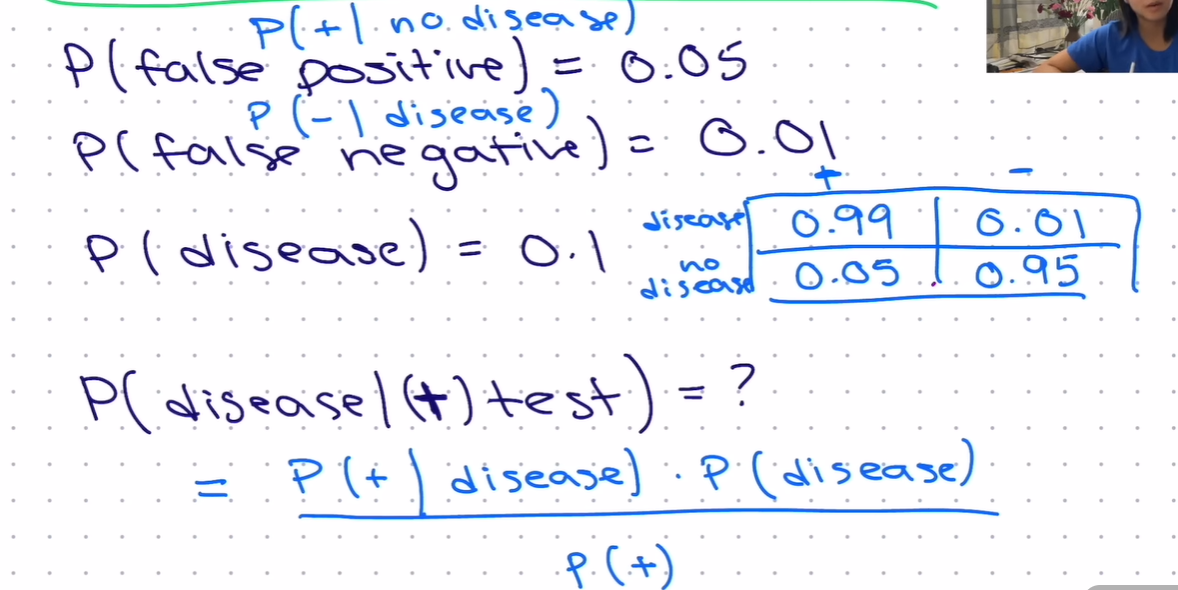

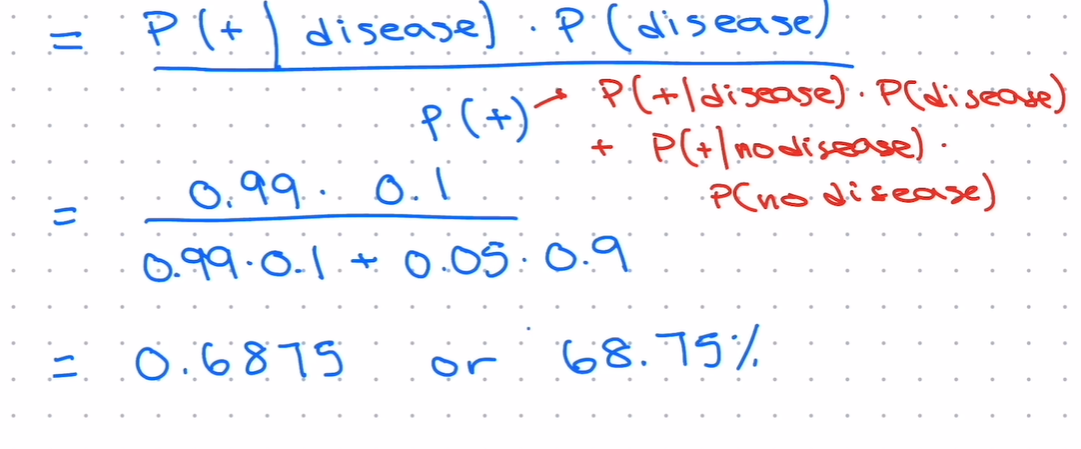

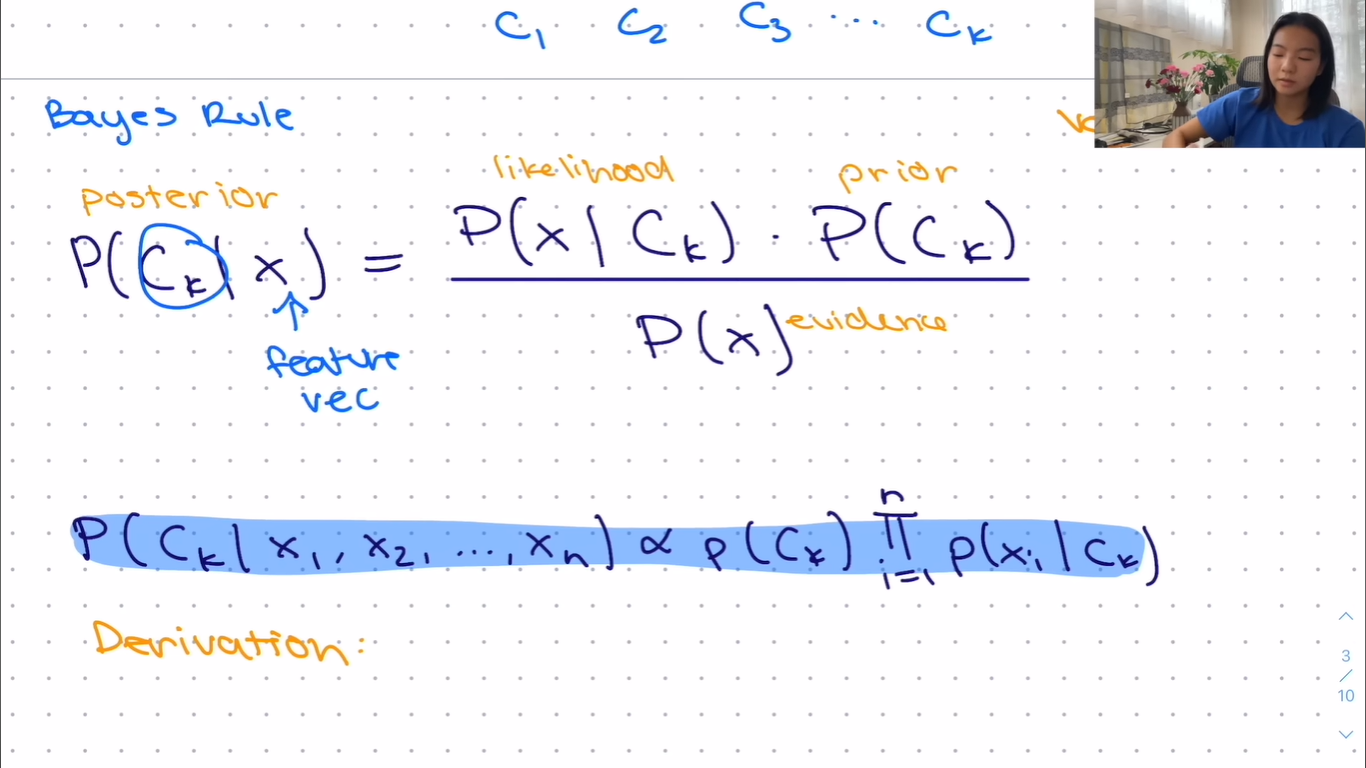

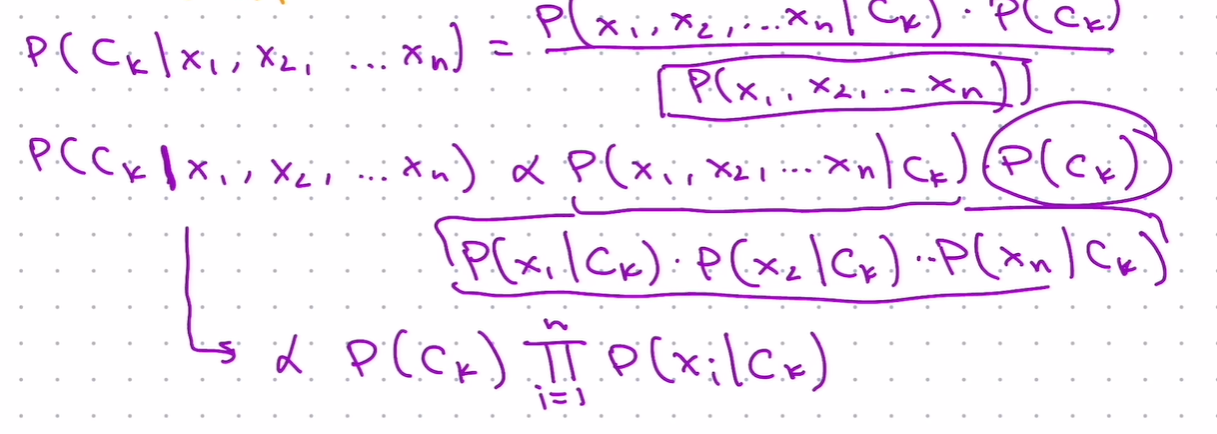

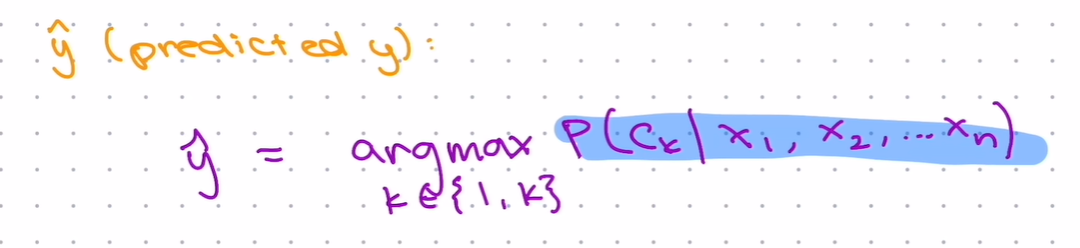

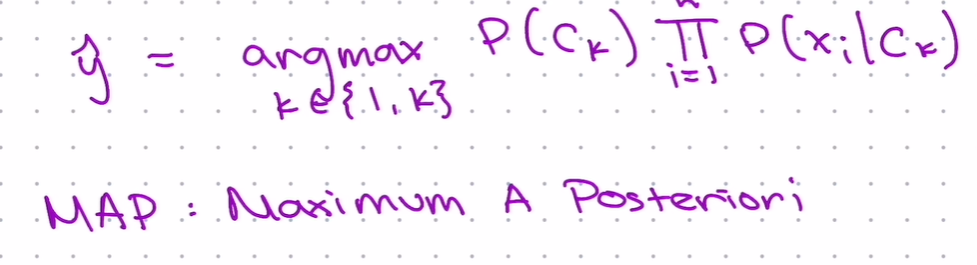

In [48]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [52]:
y_pred = nb_model.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1339
           1       0.74      0.89      0.81      2465

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



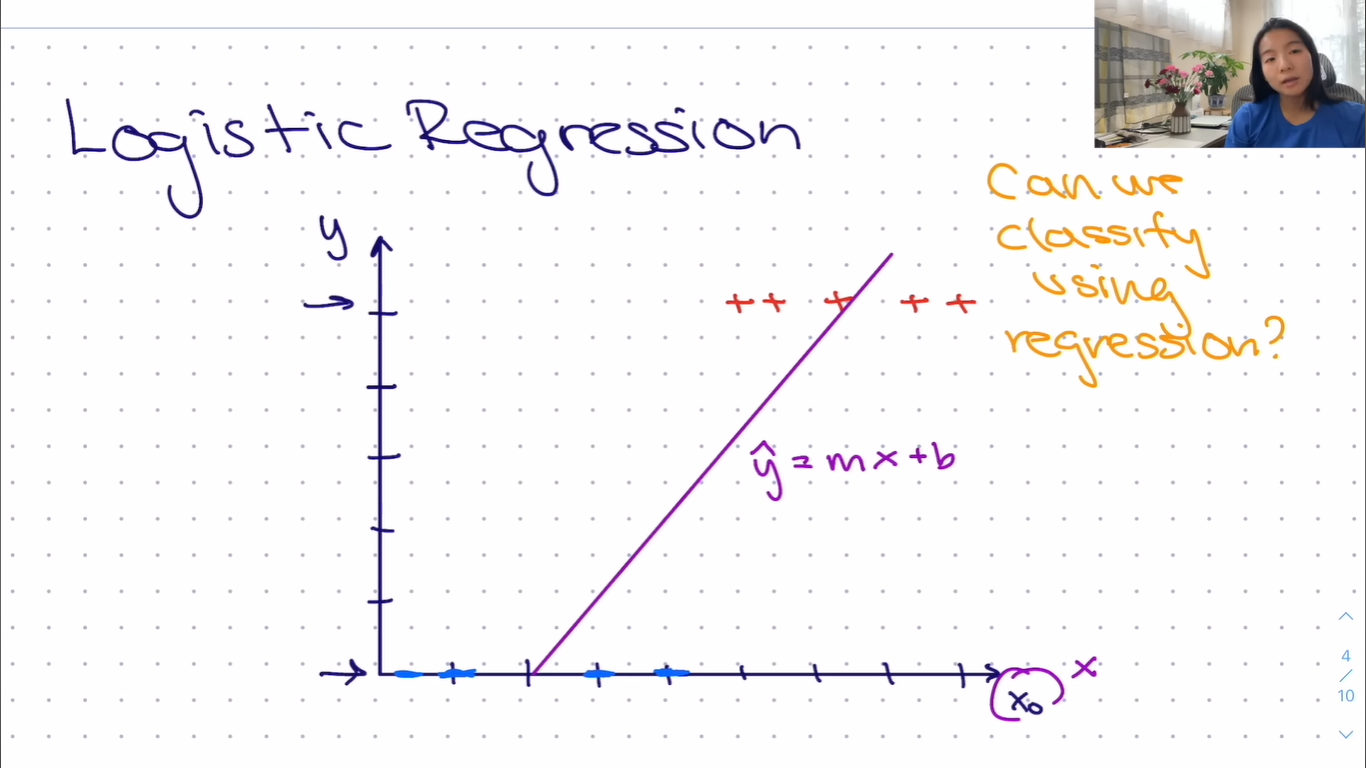

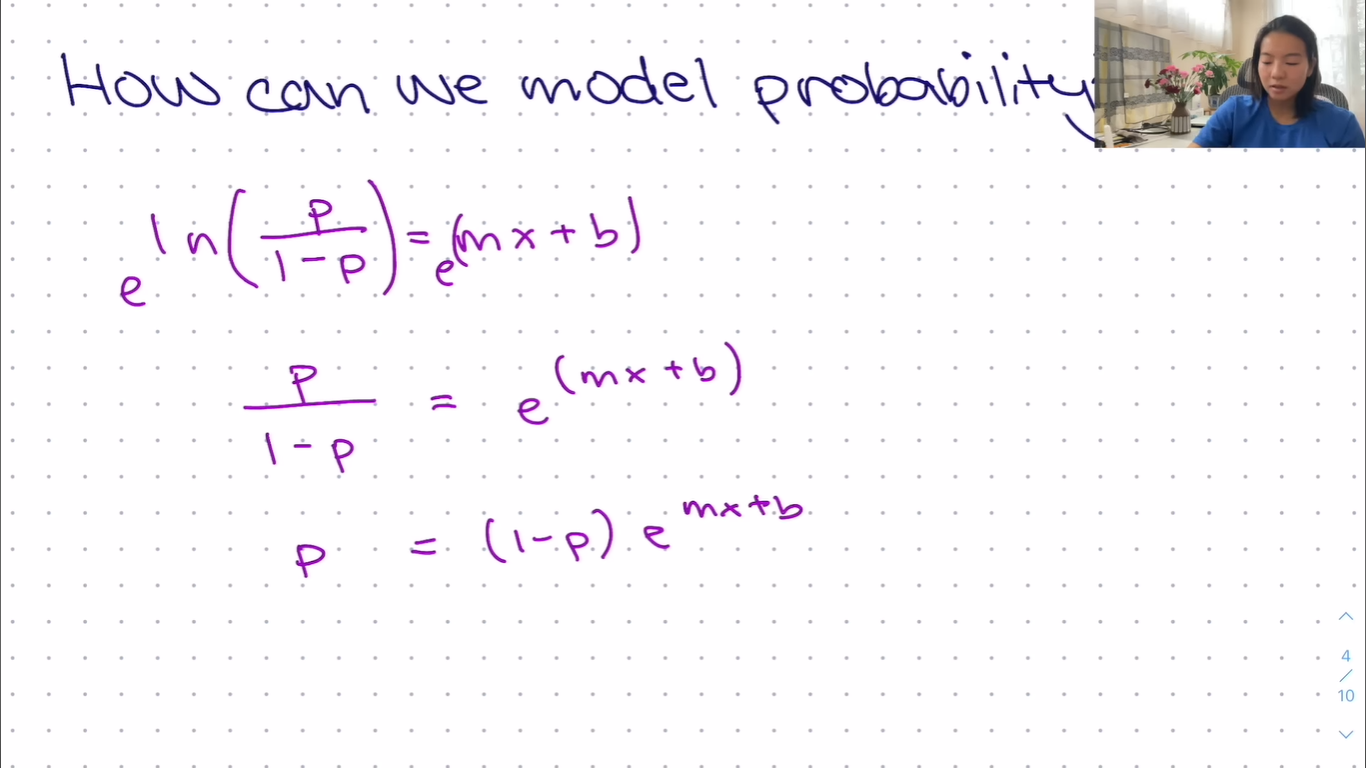

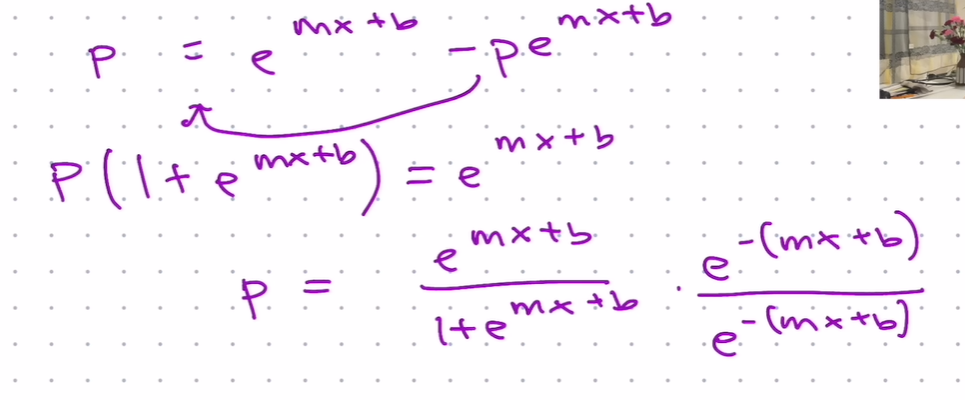

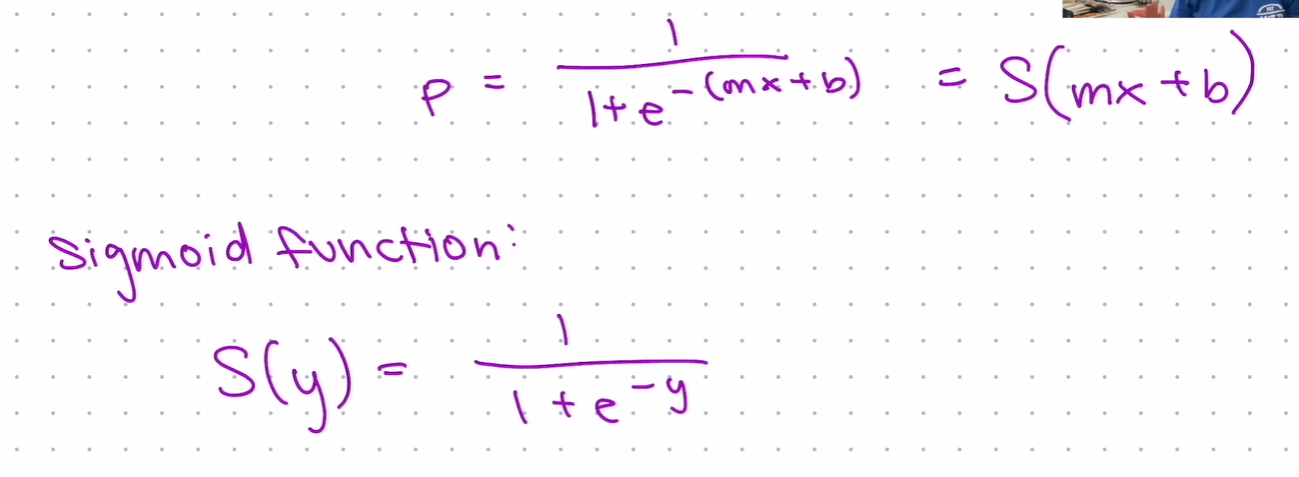

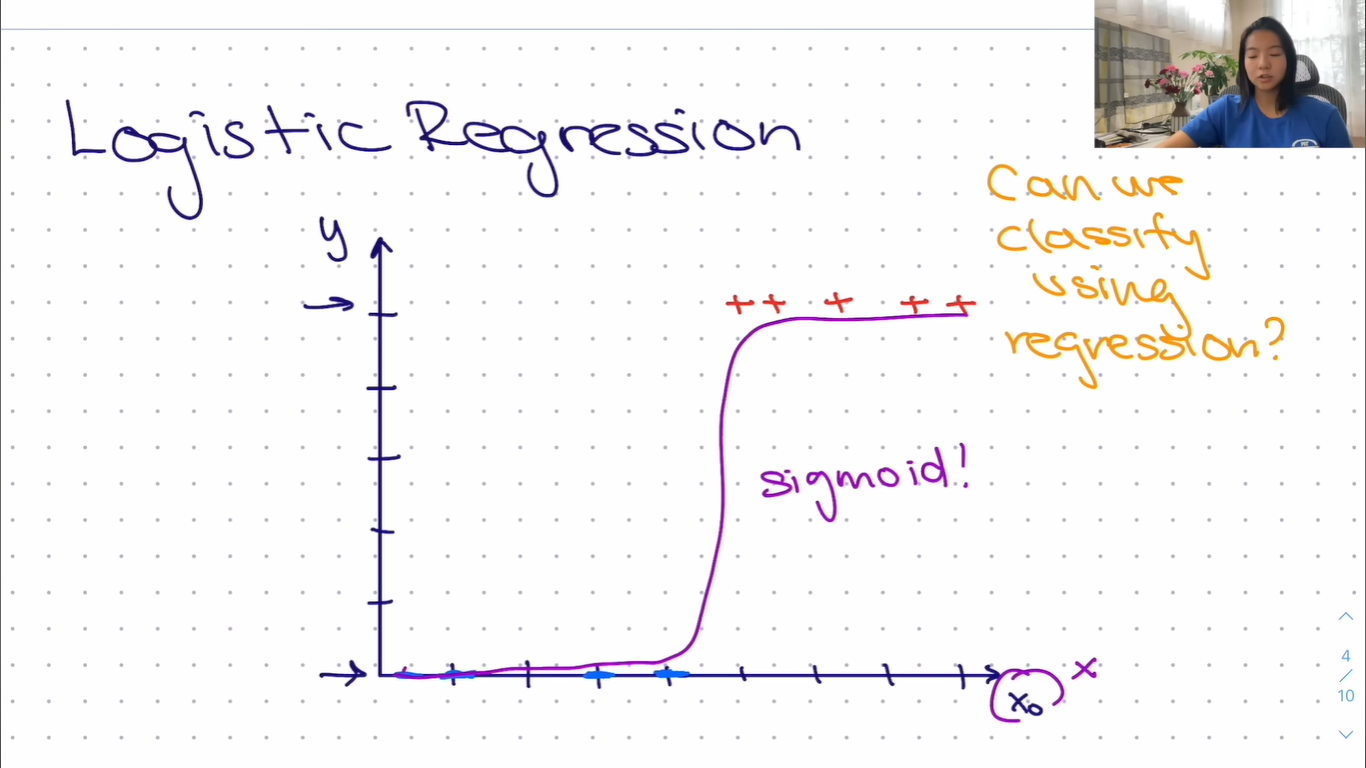

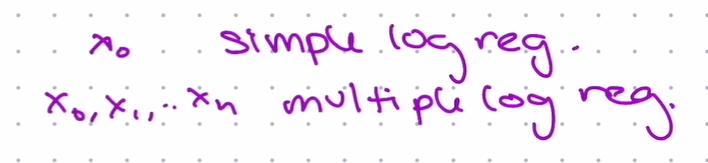

In [54]:
from  sklearn.linear_model import LogisticRegression

In [55]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [56]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1339
           1       0.85      0.82      0.84      2465

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804

